In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path


# 1. Load the data
data_path = Path.home() / 'Downloads' / 'winequality-red.csv'
data = pd.read_csv(data_path, sep=';')

# 2. Check the data
print("Columns in the data:", data.columns)
print("First few rows:\n", data.head())

# 3. Separate the features and targets
X = data.drop('quality', axis=1).values
y = data['quality'].values
X = X.astype(np.float64)
y = y.astype(np.float64)

Columns in the data: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
First few rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0 

In [5]:

# 4. Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 5. Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#6. Add bias term (x0 = 1) to each set
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_b_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [6]:

# 7. Calculate the closed-form solution
theta_closed_form = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)


In [7]:


# 8 . Set up parameters for the LMS (Least Mean Squares) algorithm
learning_rate = 0.01
num_epochs = 1000
m, n = X_b_train.shape
theta_lms = np.random.randn(n)  # Randomly initialize weights

# 9. Train the LMS model suing SGD
for epoch in range(num_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_b_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        prediction = x_i.dot(theta_lms)
        theta_lms -= learning_rate * (prediction - y_i) * x_i.flatten()


In [8]:

# 10. Make predictions using both models (LMS and closed-form) LMS predictions
y_train_pred_lms = X_b_train.dot(theta_lms)
y_val_pred_lms = X_b_val.dot(theta_lms)
y_test_pred_lms = X_b_test.dot(theta_lms)

# 11.Closed-form predictions
y_train_pred_closed = X_b_train.dot(theta_closed_form)
y_val_pred_closed = X_b_val.dot(theta_closed_form)
y_test_pred_closed = X_b_test.dot(theta_closed_form)

# 12. Defin  RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# 13.print RMSE for both models
# LMS RMSE
train_rmse_lms = rmse(y_train, y_train_pred_lms)
val_rmse_lms = rmse(y_val, y_val_pred_lms)
test_rmse_lms = rmse(y_test, y_test_pred_lms)

print(f'LMS Train RMSE: {train_rmse_lms}')
print(f'LMS Validation RMSE: {val_rmse_lms}')
print(f'LMS Test RMSE: {test_rmse_lms}')

# Closed-form RMSE
train_rmse_closed = rmse(y_train, y_train_pred_closed)
val_rmse_closed = rmse(y_val, y_val_pred_closed)
test_rmse_closed = rmse(y_test, y_test_pred_closed)

print(f'Closed-form Train RMSE: {train_rmse_closed}')
print(f'Closed-form Validation RMSE: {val_rmse_closed}')
print(f'Closed-form Test RMSE: {test_rmse_closed}')


LMS Train RMSE: 0.6744281378769581
LMS Validation RMSE: 0.6638023455597951
LMS Test RMSE: 0.6443519968014831
Closed-form Train RMSE: 0.6512995910592836
Closed-form Validation RMSE: 0.6491653006166561
Closed-form Test RMSE: 0.5988611695570157


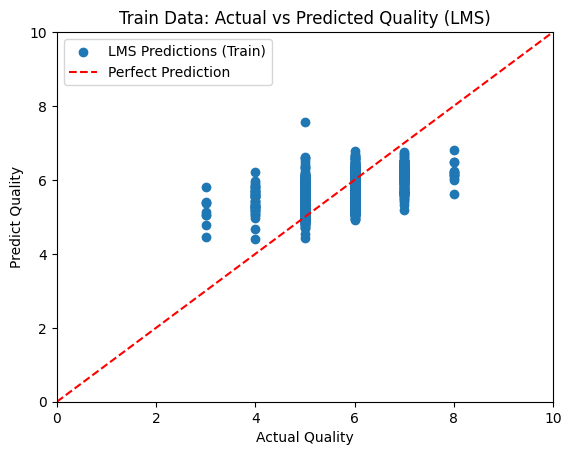

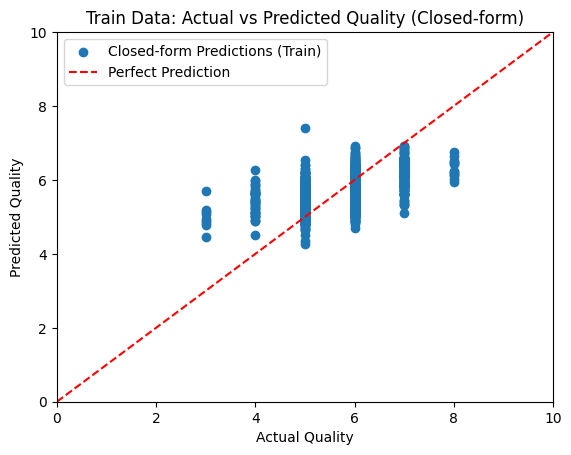

In [9]:

# 14. Plot the actual vs predicted quality for the LMS model on the training set
plt.figure()
plt.scatter(y_train, y_train_pred_lms, label='LMS Predictions (Train)')
plt.xlabel("Actual Quality")
plt.ylabel("Predict Quality")
plt.title("Train Data: Actual vs Predicted Quality (LMS)")
plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction')
plt.legend()
plt.axis([0, 10, 0, 10])


# 15. Plot the actual vs predicted quality for the closed-form solution
plt.figure()
plt.scatter(y_train, y_train_pred_closed, label='Closed-form Predictions (Train)')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Train Data: Actual vs Predicted Quality (Closed-form)")
plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction')
plt.legend()
plt.axis([0, 10, 0, 10])


# Finally, show all plots
plt.show()

In [10]:

# interpret the plot
print('interpret the plot：')
print("1. Perfect Prediction Line is the Red line, represents the ideal case where the predicted values perfectly match.")
print("2. The blue dots show that most predictions are somewhat scattered around the red line, suggesting that the model is making reasonable predictions but not perfectly matching the actual values.")
print("3. Since all the training values are discrete (all are integers), so in the graph it is all discrete with respect to the x-axis.")


interpret the plot：
1. Perfect Prediction Line is the Red line, represents the ideal case where the predicted values perfectly match.
2. The blue dots show that most predictions are somewhat scattered around the red line, suggesting that the model is making reasonable predictions but not perfectly matching the actual values.
3. Since all the training values are discrete (all are integers), so in the graph it is all discrete with respect to the x-axis.
